# ADVERTISING

Doğrusal Regresyon modeli, Makine Öğrenimindeki en basit tahmin modellerinden biridir. Kendisine uygun verilere dayanarak düz çizgi formülü türeterek tahmin yapar. Ancak ne kadar basit olursa olsun, Doğrusal Regresyon bunun gibi kullanım durumlarında hala etkili bir model olabilir.

**Hakkında**
* Bu veri kümesi Kaggle'a yüklendi. TV, radyo ve gazete reklamları için ayrılan bütçe ile ortaya çıkan satışlara ilişkin verileri içerir.

**Hedef Değişken**
* (int) Satışlar

**Tahmin ediciler**
1. (int) TV - TV'deki reklamların bütçesi
1. (int) Radyo - Radyodaki reklamların bütçesi
1. (int) Gazete - Gazete ilan bütçesi

**Kaynaklar**
* https://towardsdatascience.com/linear-regression-python-implementation-ae0d95348ac4
* https://www.kaggle.com/sazid28/advertising.csv

In [27]:
import pandas as pd # Data dosyalarini okuma paketi
pd.set_option("display.max_columns",55)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
df=pd.read_csv('advertising.csv')

In [30]:
#EDA

In [31]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [32]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [34]:
df.corr(numeric_only=True)

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [35]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


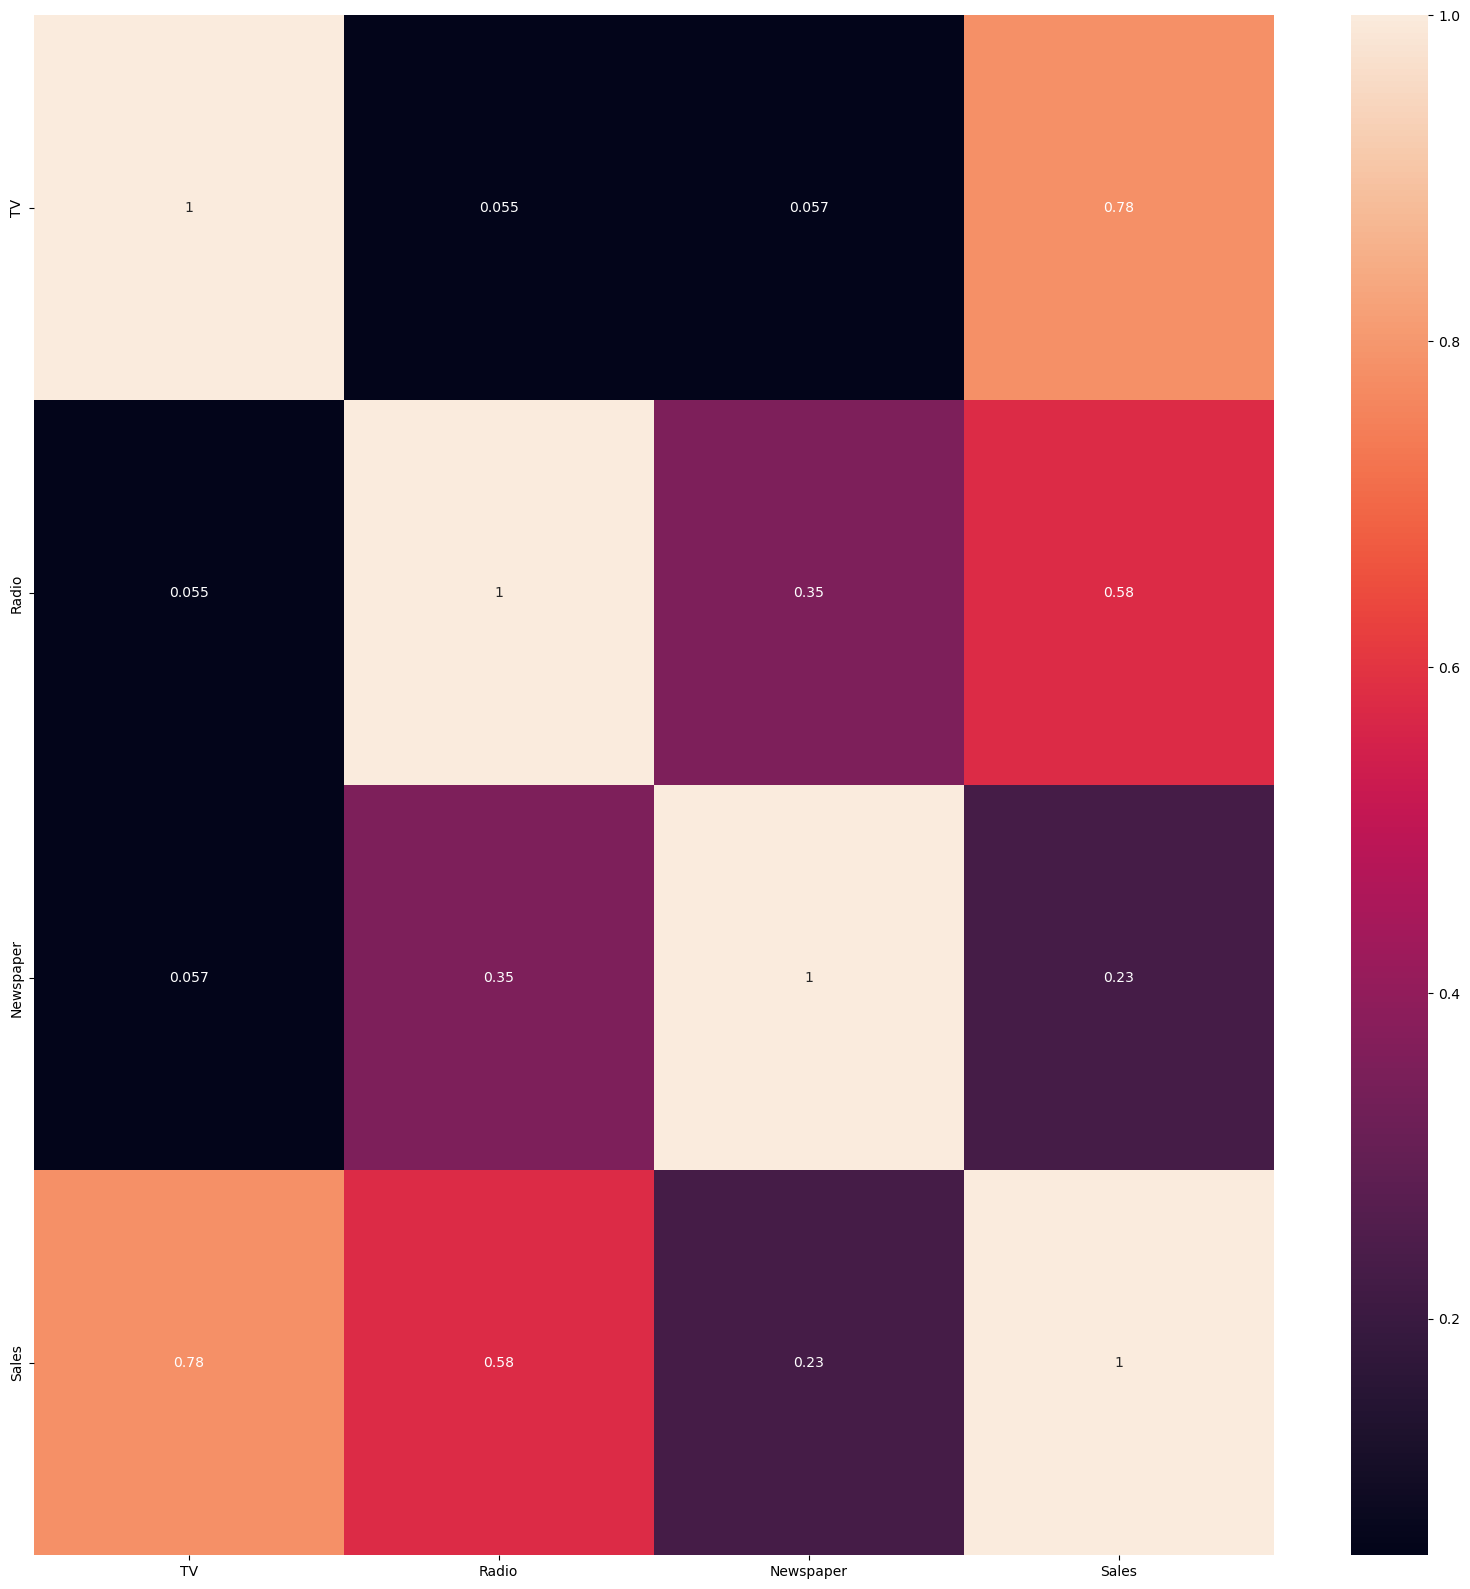

In [37]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True),annot=True);

In [38]:
x=df[['TV','Radio','Newspaper']]
y=df[['Sales']]

<Axes: xlabel='TV'>

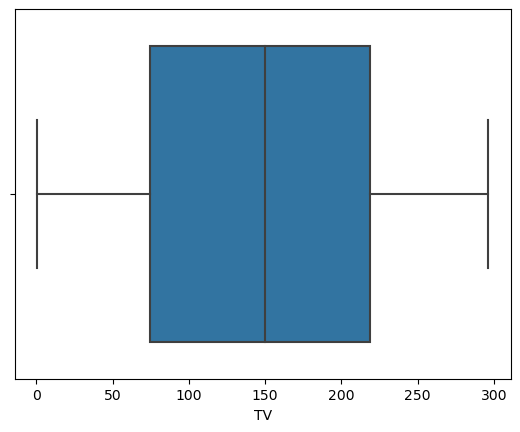

In [39]:
sns.boxplot(x=df['TV'])

<Axes: xlabel='Radio'>

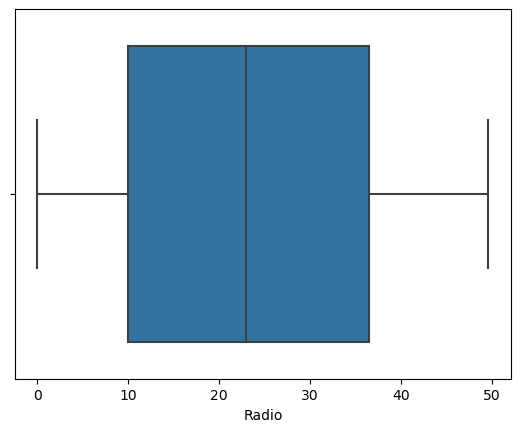

In [40]:
sns.boxplot(x=df['Radio'])

<Axes: xlabel='Newspaper'>

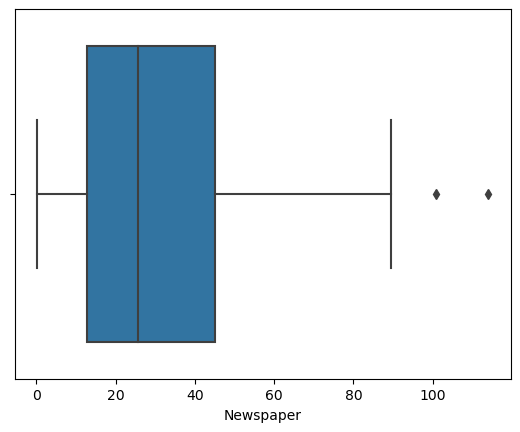

In [41]:
sns.boxplot(x=df['Newspaper'])

Text(0.5, 1.0, 'Sales vs Radio')

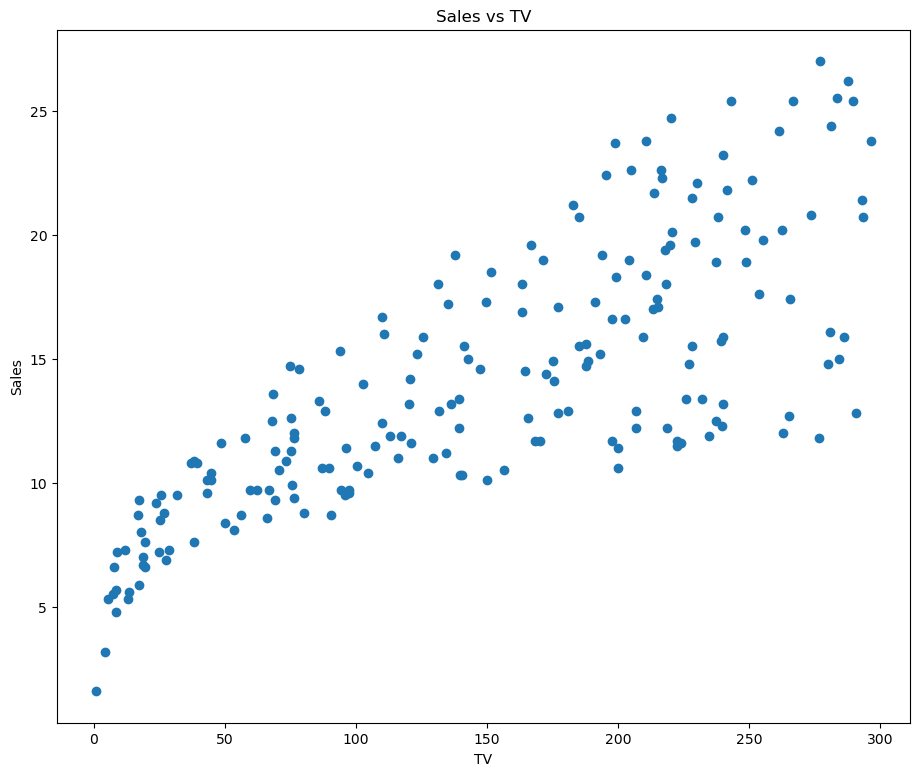

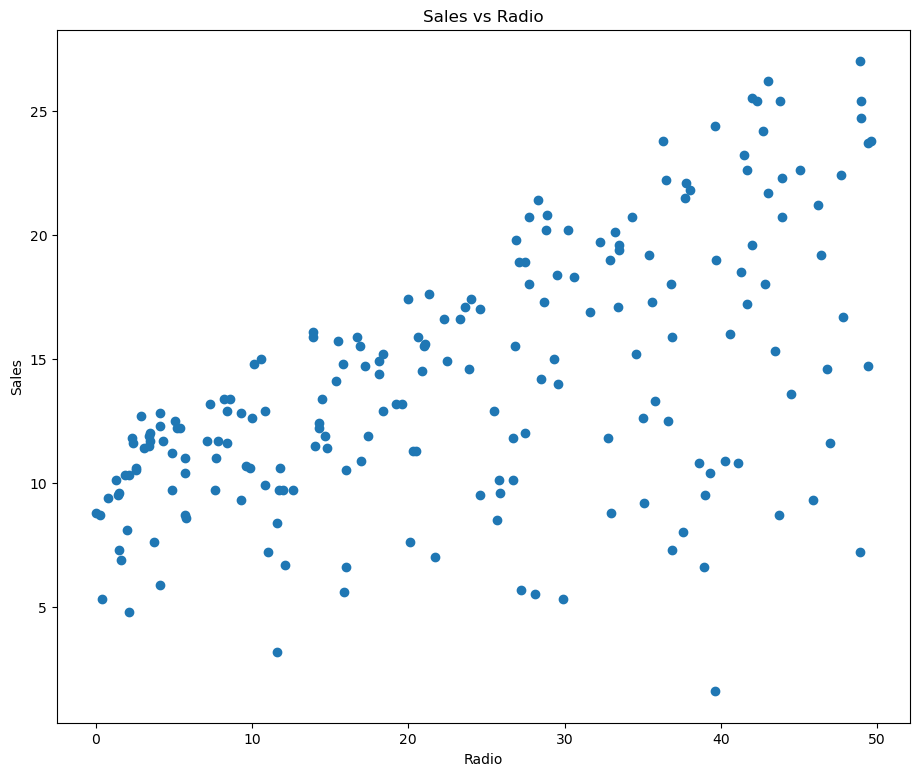

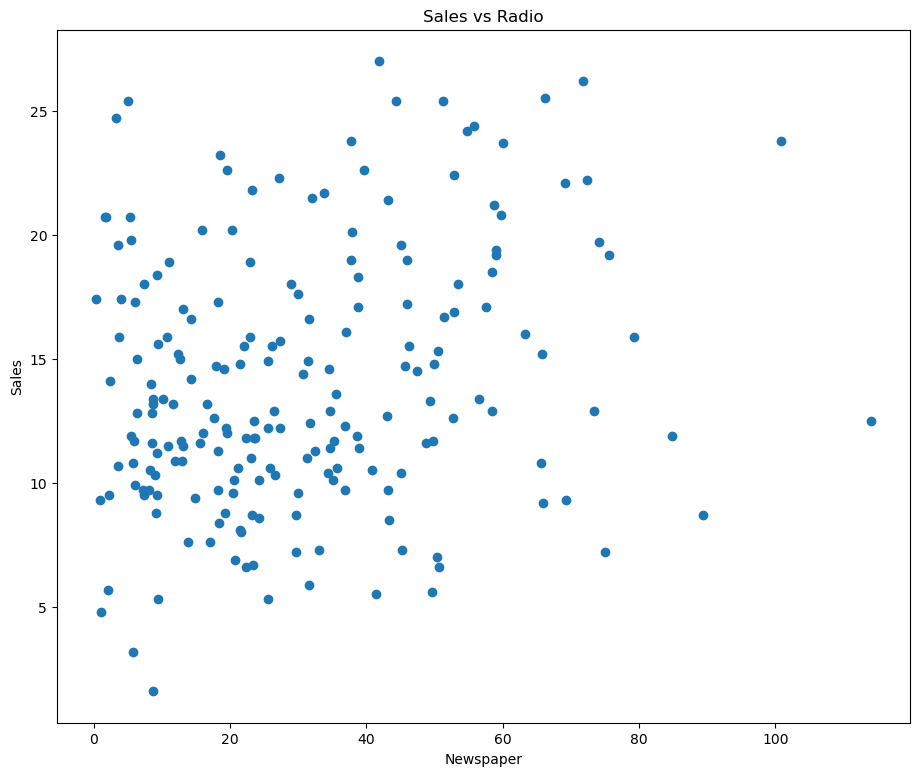

In [42]:
### Visualize the relationship using scatterplot

f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(df["TV"], df["Sales"])
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Sales vs TV")

f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(df["Radio"], df["Sales"])
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title("Sales vs Radio")

f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(df["Newspaper"], df["Sales"])
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.title("Sales vs Radio")

Text(0.5, 1.0, 'Radio vs Radio')

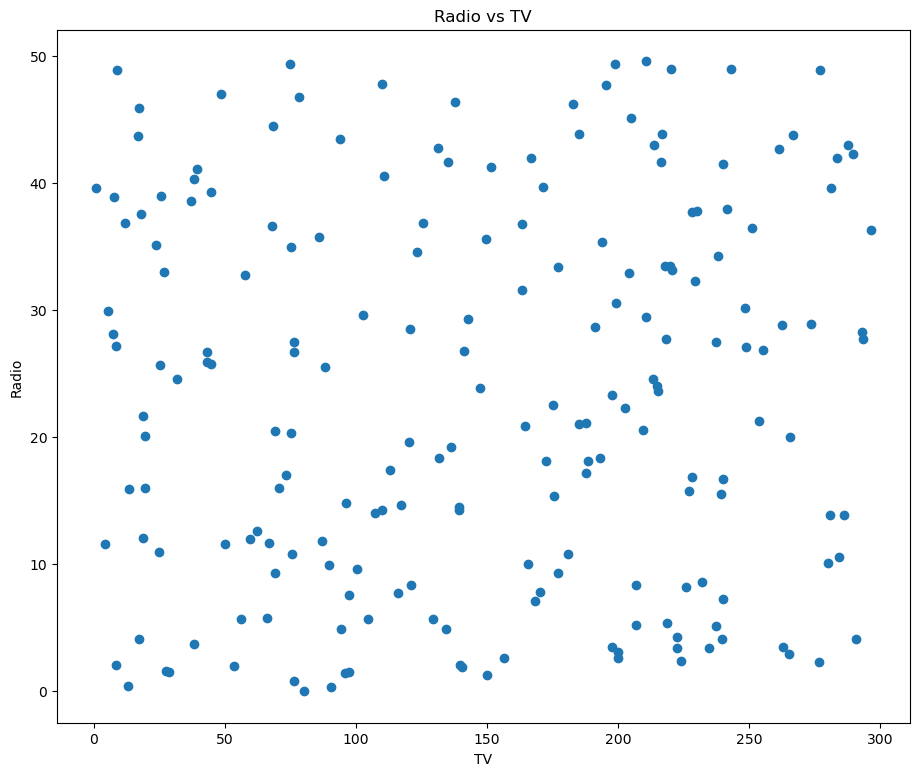

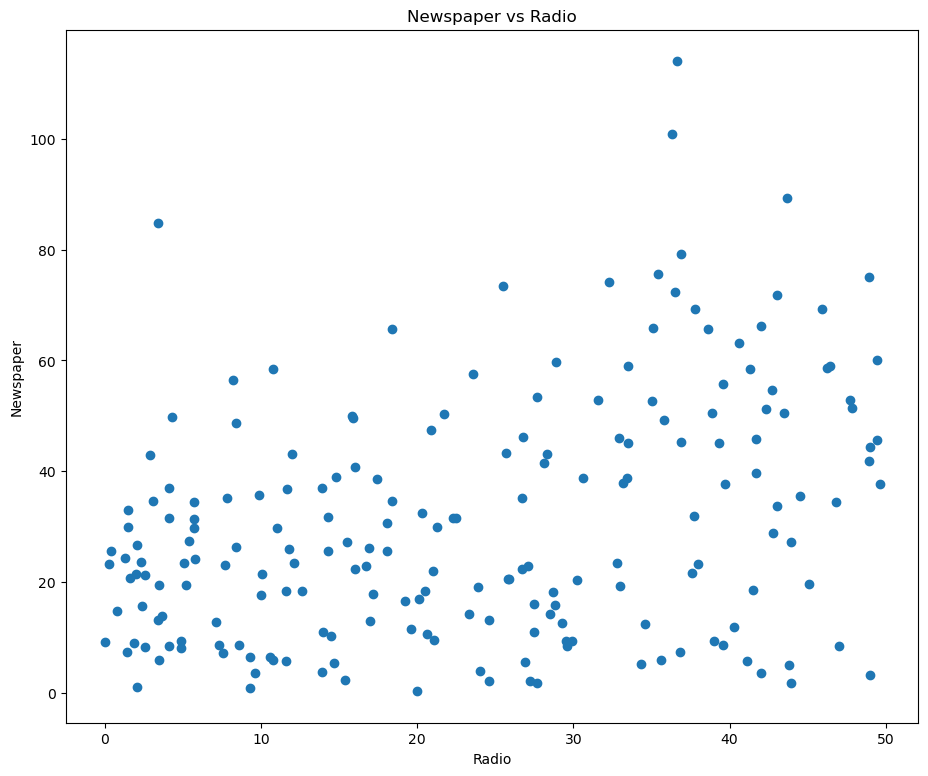

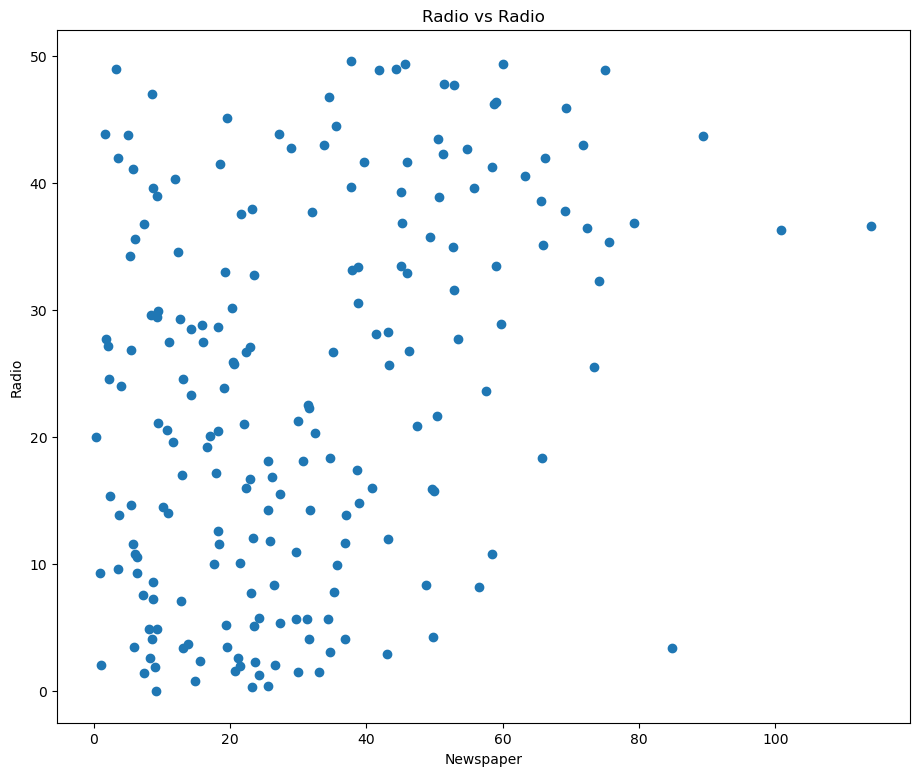

In [43]:
### Visualize the relationship using scatterplot

f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(df["TV"], df["Radio"])
plt.xlabel("TV")
plt.ylabel("Radio")
plt.title("Radio vs TV")

f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(df["Radio"], df["Newspaper"])
plt.xlabel("Radio")
plt.ylabel("Newspaper")
plt.title("Newspaper vs Radio")

f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(df["Newspaper"], df["Radio"])
plt.xlabel("Newspaper")
plt.ylabel("Radio")
plt.title("Radio vs Radio")

In [44]:
### Separate the predictor and the target variable 
x = df.drop("Sales", axis = 1)
y = df["Sales"]

print(f"==x (predictors)==\nSize: {x.shape}\n{x.head()}\n Data Type: {type(x.head())} ")
print(f"\n==y (target)==\nSize: {y.shape}\n{y.head()}\n{type(y.head())}")

==x (predictors)==
Size: (200, 3)
      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4
 Data Type: <class 'pandas.core.frame.DataFrame'> 

==y (target)==
Size: (200,)
0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64
<class 'pandas.core.series.Series'>


In [45]:
### Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("\nx_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (160, 3)
y_train size: (160,)

x_test size: (40, 3)
y_test size: (40,)


In [46]:
### Initialize dataframe that will store the results
df_results = pd.DataFrame(columns = ["Predictor/s", "R2", "MAE", "MSE", "RMSE", "Cross-Val Mean"])

In [47]:
### Make a function for Linear Regression with default values
def linreg_model(xtrain, xtest):
    ### Initialize algorithm
    linreg = LinearRegression()

    ### Fit the data
    linreg.fit(xtrain, y_train)
    
    ### Evaluate the model
    y_pred = linreg.predict(xtest)
    
    print("R2:", r2_score(y_pred, y_test))
    print("MAE:", mean_absolute_error(y_pred, y_test))
    print("MSE:", mean_squared_error(y_pred, y_test))
    print("RMSE:", np.sqrt(mean_squared_error(y_pred, y_test)))
    
    f, ax = plt.subplots(figsize=(11, 9))
    plt.scatter(y_pred, y_test)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Actual vs Predicted")
    
    return {"R2": r2_score(y_pred, y_test) * 100, "MAE": mean_absolute_error(y_pred, y_test), 
            "MSE": mean_squared_error(y_pred, y_test), "RMSE": np.sqrt(mean_squared_error(y_pred, y_test))}

R2: 0.8791069137120033
MAE: 1.4607567168117606
MSE: 3.1740973539761046
RMSE: 1.7815996615334502
Cross-Validation Results: [0.87302696 0.8581613  0.92968723 0.89013272 0.93146498 0.93138735
 0.7597901  0.91217097 0.83891753 0.92882311]
Cross-Validation Mean: 0.8853562237979616


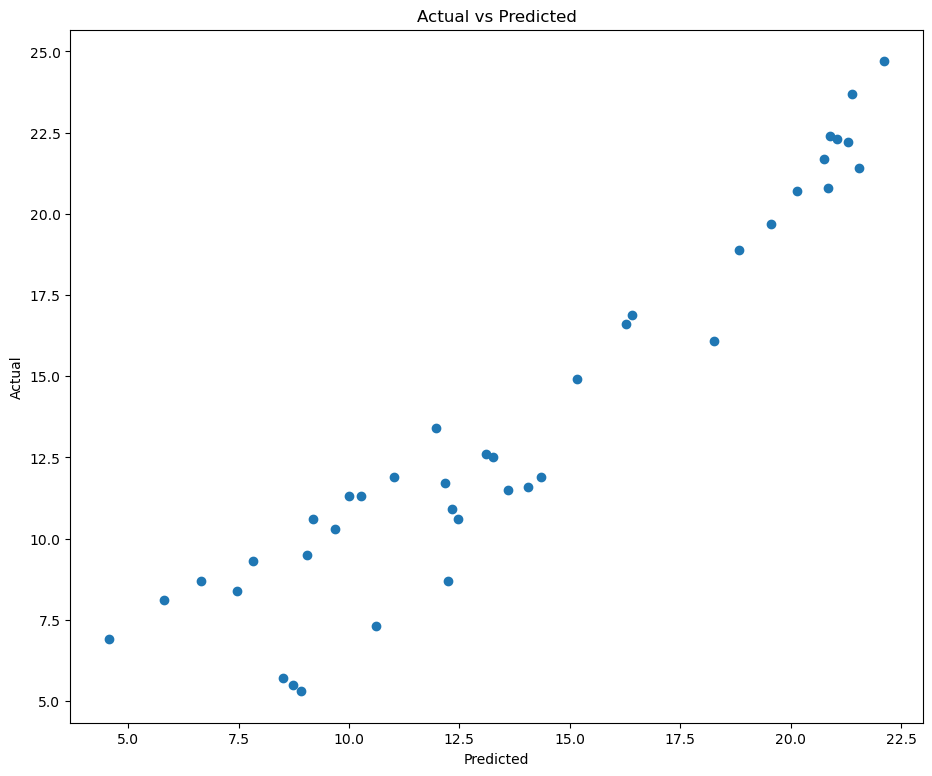

In [55]:
#Make predictions and get results
linreg_all_results = linreg_model(x_train, x_test)

#Cross-validation
cv_score = cross_val_score(LinearRegression(), x, y, cv=10)

print("Cross-Validation Results:", cv_score)
print("Cross-Validation Mean:", cv_score.mean())

#Compile validation results
linreg_all_results.update({"Predictor/s":"All", "Cross-Validation Mean": cv_score.mean() * 100})

#Create a DataFrame
df_results = pd.DataFrame()

#Add to the DataFrame
df_results = pd.concat([df_results, pd.DataFrame([linreg_all_results])], ignore_index=True)







R2: 0.4227436514531997
MAE: 2.444420003751042
MSE: 10.204654118800956
RMSE: 3.194472431998898
Cross-Val Results: [0.70015158 0.43449405 0.58322591 0.78975123 0.47952235 0.62298657
 0.66525353 0.60389703 0.16530872 0.64237498]
Cross-Val Mean: 0.5686965937483904


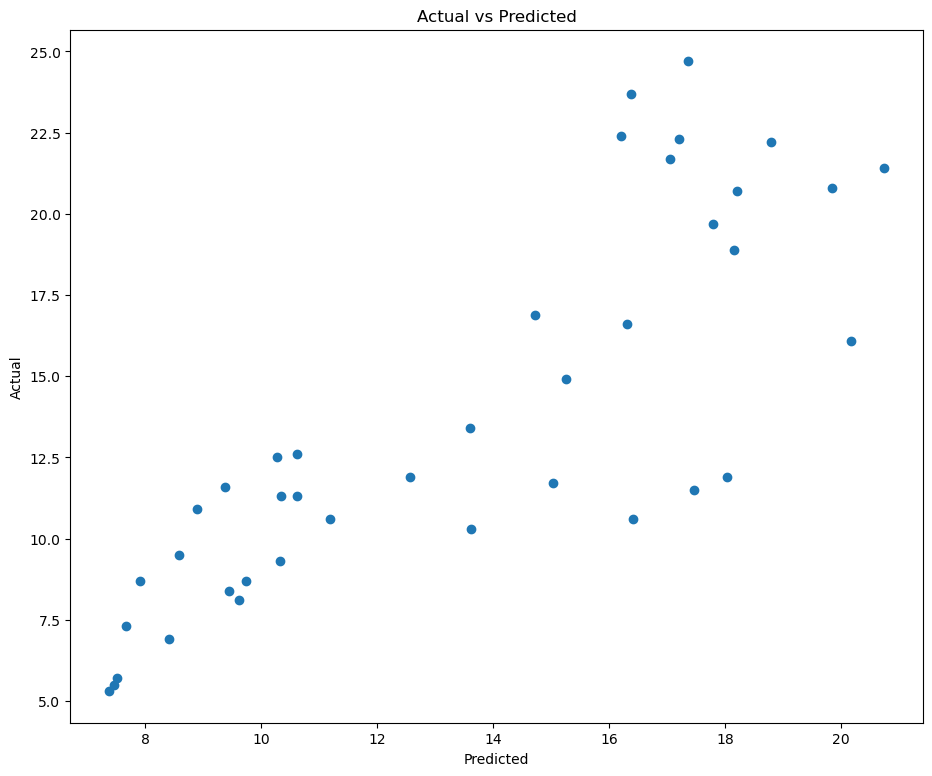

In [57]:
### Predict and get results
linreg_TV_results = linreg_model(x_train["TV"].values.reshape(-1,1), x_test["TV"].values.reshape(-1,1))

### Cross Validation
cv_score = cross_val_score(LinearRegression(), x["TV"].values.reshape(-1, 1), y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

### Compile validation results
linreg_TV_results.update({"Predictor/s":"TV", "Cross-Val Mean": cv_score.mean() * 100})

### Add the results to the dataframe

df_results = pd.concat([df_results, pd.DataFrame([linreg_TV_results])], ignore_index=True)

R2: 0.8801170145979847
MAE: 1.444302313822758
MSE: 3.1379480090683516
RMSE: 1.771425417303351
Cross-Val Results: [0.87936561 0.85860496 0.92960574 0.89040105 0.93302554 0.93129743
 0.76486772 0.91373255 0.83925519 0.92951475]
Cross-Val Mean: 0.8869670516810129


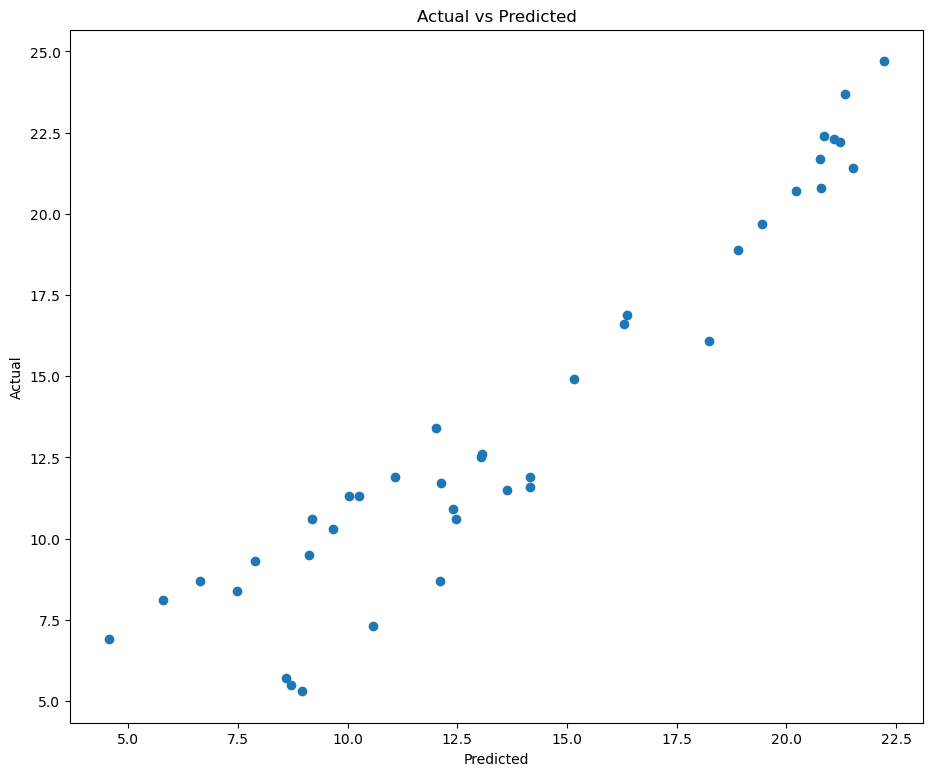

In [65]:
linreg_TVR_results = linreg_model(x_train[["TV", "Radio"]], x_test[["TV", "Radio"]])

### Cross Validation
cv_score = cross_val_score(LinearRegression(), x[["TV", "Radio"]], y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

### Compile validation results
linreg_TVR_results.update({"Predictor/s":"TV & Radio", "Cross-Val Mean": cv_score.mean() * 100})

### Add the results to the dataframe
df_results = pd.concat([df_results, pd.DataFrame([linreg_TVR_results])], ignore_index=True)


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error


def algo_test(x,y):
        #Bütün modelleri tanımlıyorum
        L=LinearRegression()
        R=Ridge()
        Lass=Lasso()
        E=ElasticNet()
        ETR=ExtraTreeRegressor()
        GBR=GradientBoostingRegressor()
        kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        xgb=XGBRegressor()
       
        
        algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb]
        algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Boosting','KNeighborsRegressor','Decision Tree','XGBRegressor']
        
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2,random_state=42)
        
        r_squared= []
        rmse= []
        mae= []
        
        #Hata ve doğruluk oranlarını bir tablo haline getirmek için bir dataframe oluşturuyorum
        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
        
        
        for algo in algos:
            p=algo.fit(x_train,y_train).predict(x_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))
        
            

        #result adlı tabloya doğruluk ve hata oranlarımı yerleştiriyorum
        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae
        
       #oluşturduğum result tablosunu doğruluk oranına (r2_score) göre sıralayıp dönüyor
        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [68]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Gradient Boosting,0.983321,0.725559,0.615242
XGBRegressor,0.972470,0.932166,0.725829
Extra Tree,0.962663,1.085587,0.895000
Decision Tree,0.948849,1.270630,0.935000
KNeighborsRegressor,0.910620,1.679625,1.189000
Lasso,0.900401,1.773046,1.452202
ElasticNet,0.899961,1.776959,1.456659
Ridge,0.899438,1.781599,1.460766
Linear,0.899438,1.781600,1.460757
